<div style="background:#E9FFF6; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFN619 - Data Analytics for Strategic Decision Makers (2023_sem1)</div>

# IFN619 :: A2-DataAnalyticsCycle

### QDAVI

In our approach to data analytics, we will follow a process that requires that we address 5 questions:

1. Which is the right question?
2. Which is the right data?
3. Which is the right analysis?
4. Which is the right visualisation?
5. Which is the right insight?

For this unit, we are concerned with more than just data analytics, we are interested in what is *appropriate, efficous, ethical ...* what is ***right!***

You can easily remember the data analytics cycle by the acronym **QDAVI**:

1. **Q**uestion
2. **D**ata
3. **A**nalysis
4. **V**isualisation
5. **I**nsight

<img src="graphics/QDAVI_cycle_sm.png" width="50%" />


---

## QDAVI Example

### Question

In this part of the cycle we will:
1. consider the context, and the main concern of stakeholders 
2. identify a specific question (or questions) to address the context and stakeholder concern/s, and 
3. plan how we might connect the question with available data for analysis

**CONTEXT:** We have many students in IFN619 coming from different backgrounds and choosing to study for different reasons. A better understanding of the cohort may be helpful for the teaching team, allowing them to adapt the learning experiences to groups with different needs.

> **QUESTION** What different groups of students are studying IFN619, and how might information about the cohort help the teaching team provide meaningful learning experiences?

**PLAN:** To answer this question, we might consider the kinds of groups that might be possible within available data. Some thoughts are:
- courses
- majors/minors
- part time/full time (mode)
- connections between studios and tutes (registration)
- relationship between mode and registration

The courses and majors/minors may provide information on whether the student has some knowledge of IT or whether their main field is not IT. The mode and registration information may provide an indicator of students that are studying while undertaking other responsibilities (like working and/or caring).

### Data

In this part of the cycle, we will:
1. Identify appropriate data to address the question
2. Read the data into the analysis environment (Jupyter)
3. Clean the data and format it so that it is ready for analysis

As part of this process, we will take into account: 
- the shape of the data and whether there is meaning in the structure - e.g. do rows and columns mean something?
- the completeness of the data - is any data missing?
- the appropriateness of the data - do any aspects of the data need to be modified prior to analysis - e.g. dates and times

#### Required libraries

For any data analysis, we need to use existing software that has been loaded into the Jupyter environment in the form of 'libraries', 'packages', or 'modules'. To make these libraries available to your notebook, you need to `import` them.

In [1]:
import pandas as pd # Dataframes
import numpy as np  # Mathematical functions
import re           # Regular expressions

#### Read in the data

1. Take a look at the data first to identify its structure
2. Use appropriate code to read the data in to Jupyter
3. Display the data to check it was read correctly

In [28]:
# Read the CSV into a dataframe
file_name = "ifn619-class_data-2023.csv"
class_df = pd.read_csv(f"data/{file_name}",index_col='id')
class_df.shape

(190, 5)

In [3]:
# We can take a look at the dataframe by adding the variable name as the last line of a cell
class_df

,course,mode,tutorial,studio,major
id,,,,,
6c6a005f-b7b2-4250-a025-a3d6d4d574f7,IN27,PT,TUT 6,STU 3,IN27MJR-STATDAT
b394172e-ba89-4d1d-9e69-e24fe10f8b3a,IN20,FT,TUT 2,STU 2,IN20MJR-DATASC
9d912798-7cf2-49dd-99c0-096b79f985d5,IN20,FT,TUT 5,STU 3,IN20MJR-SOFTDEV
377e91bf-7e57-47f6-b583-10a21e7ec73c,IN23,FT,TUT 3,STU 1,
b3538492-3171-41e8-b130-bde084de87ce,IN27,FT,TUT 5,NaN,IN27MJR-BIOMEDS
...,...,...,...,...,...
63dd47e0-d33e-4be4-9792-8e1ff25f8081,IN27,FT,TUT 1,STU 1,IN27MJR-COMPDAT
6568b67d-7906-489d-a4e4-b66b3c5b01e3,IN27,FT,NaN,STU 3,IN27MJR-BIOMEDS
e32a8a69-04a6-40f3-be54-335603ceadf5,IN27,FT,TUT 6,STU 3,IN27MJR-STATDAT


#### Clean the data

Looking at the data, there are some cells that have `NaN` in them. This is short for *not a number* and is an indicator that there is nothing in these cells. Importantly, in code *nothing* or `null` is different to `0` or an empty string`""`.

Let's check how many of these `NaN`s we have in the data...


In [4]:
# For each column check if a cell isna() and then sum() to get total
class_df.isna().sum()

course      3
mode        0
tutorial    5
studio      4
major       3
dtype: int64

Before we can fix this, we need to know what the missing data means.

In the case of the course code, the value is missing because the data didn't include any courses of 1 or 2 people (as they may be identified by their uniqueness in the data). So this missing data could be characterised as `OTHER` (a course other than the main courses listed).

Let's replace the `NaN`s with `OTHER`s for the course column...

In [5]:
# Replace missing data for course column
class_df['course'] = class_df['course'].fillna('OTHER')
# Check that it worked
class_df.isna().sum()


course      0
mode        0
tutorial    5
studio      4
major       3
dtype: int64

Now we can replace the the `NaN`s with `NR`s for the tutorial and studio columns...

In [7]:
# Replace missing data for tutorial and studio columns
columns = ['tutorial','studio']
class_df[columns] = class_df[columns].fillna('NR')
# Check that it worked
class_df.isna().sum()

course      0
mode        0
tutorial    0
studio      0
major       3
dtype: int64

In the case of the major column, there is something else lurking. Let's take a look at more rows of the dataframe...

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
class_df

,course,mode,tutorial,studio,major
id,,,,,
6c6a005f-b7b2-4250-a025-a3d6d4d574f7,IN27,PT,TUT 6,STU 3,IN27MJR-STATDAT
b394172e-ba89-4d1d-9e69-e24fe10f8b3a,IN20,FT,TUT 2,STU 2,IN20MJR-DATASC
9d912798-7cf2-49dd-99c0-096b79f985d5,IN20,FT,TUT 5,STU 3,IN20MJR-SOFTDEV
377e91bf-7e57-47f6-b583-10a21e7ec73c,IN23,FT,TUT 3,STU 1,
b3538492-3171-41e8-b130-bde084de87ce,IN27,FT,TUT 5,NR,IN27MJR-BIOMEDS
3dc62211-dcf6-43ee-a1a1-6d08d534e2d8,IN27,FT,TUT 6,STU 3,IN27MJR-COMPDAT
bc911c9b-2275-40b6-82cd-da5872063a22,IN26,PT,TUT 5,STU 3,
89a575df-6625-4c54-9165-5d221ce198f6,IN27,FT,TUT 6,STU 2,IN27MJR-COMPDAT
57dc553d-35b8-491d-8e71-daf427bb183e,IN27,FT,TUT 3,STU 3,IN27MJR-COMPDAT


What's going on here? We have some cells with `NaN` and some that are just blank. We need to take a closer look at the data in the major column...

In [10]:
# Take a look at the dataframe
print(list(class_df.major))

['IN27MJR-STATDAT', 'IN20MJR-DATASC', 'IN20MJR-SOFTDEV', ' ', 'IN27MJR-BIOMEDS', 'IN27MJR-COMPDAT', ' ', 'IN27MJR-COMPDAT', 'IN27MJR-COMPDAT', 'IN27MJR-COMPDAT', 'IN27MJR-STATDAT', 'IN20MJR-SOFTDEV', ' ', ' ', ' ', 'IN20MJR-DATASC', 'IN27MJR-STATDAT', ' ', ' ', 'IN20MJR-DATASC', ' ', ' ', nan, 'IN20MJR-SOFTDEV', ' ', 'IN27MJR-COMPDAT', 'IN20MJR-DATASC', 'IN20MJR-COMPSC', ' ', 'IN20MJR-BUSANAL', 'IN20MJR-DATASC', 'IN27MJR-STATDAT', ' ', ' ', 'IN20MJR-DATASC', 'IN20MJR-BUSANAL', 'IN20MJR-COMPSC', ' ', ' ', ' ', 'IN20MJR-DATASC', ' ', 'IN20MJR-DATASC', 'IN20MJR-DATASC', 'IN20MJR-COMPSC', 'IN27MJR-STATDAT', 'IN20MJR-DATASC', ' ', 'IN27MJR-COMPDAT', ' ', 'IN27MJR-COMPDAT', 'IN27MJR-COMPDAT', 'IN20MJR-DATASC', 'IN27MJR-COMPDAT', 'IN27MJR-BIOMEDS', 'IN27MJR-STATDAT', 'IN20MJR-BUSANAL', 'IN20MJR-DATASC', ' ', 'IN20MJR-DATASC', 'IN20MJR-DATASC', 'IN20MJR-COMPSC', ' ', ' ', ' ', 'IN27MJR-STATDAT', 'IN20MJR-DATASC', 'IN20MJR-DATASC', 'IN27MJR-COMPDAT', 'IN20MJR-DATASC', 'IN27MJR-STATDAT', ' ', ' 

It's now obvious that there is *whitespace* in the column as well as `NaN`s. Let's convert the whitespace to `NaN`s and then replace the `NaN`s with `NONE`

In [11]:
# Replace whitespace major column
class_df['major'] = class_df['major'].replace(r'^\s*$', np.nan, regex=True)
# Check that it worked
class_df.isna().sum()

course       0
mode         0
tutorial     0
studio       0
major       71
dtype: int64

In [12]:
# Replace missing data for course column
class_df['major'] = class_df['major'].fillna('NONE')
# Check that it worked
class_df.isna().sum()

course      0
mode        0
tutorial    0
studio      0
major       0
dtype: int64

In [13]:
class_df

,course,mode,tutorial,studio,major
id,,,,,
6c6a005f-b7b2-4250-a025-a3d6d4d574f7,IN27,PT,TUT 6,STU 3,IN27MJR-STATDAT
b394172e-ba89-4d1d-9e69-e24fe10f8b3a,IN20,FT,TUT 2,STU 2,IN20MJR-DATASC
9d912798-7cf2-49dd-99c0-096b79f985d5,IN20,FT,TUT 5,STU 3,IN20MJR-SOFTDEV
377e91bf-7e57-47f6-b583-10a21e7ec73c,IN23,FT,TUT 3,STU 1,NONE
b3538492-3171-41e8-b130-bde084de87ce,IN27,FT,TUT 5,NR,IN27MJR-BIOMEDS
3dc62211-dcf6-43ee-a1a1-6d08d534e2d8,IN27,FT,TUT 6,STU 3,IN27MJR-COMPDAT
bc911c9b-2275-40b6-82cd-da5872063a22,IN26,PT,TUT 5,STU 3,NONE
89a575df-6625-4c54-9165-5d221ce198f6,IN27,FT,TUT 6,STU 2,IN27MJR-COMPDAT
57dc553d-35b8-491d-8e71-daf427bb183e,IN27,FT,TUT 3,STU 3,IN27MJR-COMPDAT


### Analysis

In this part of the cycle, we will:
1. Select appropriate analysis to address the question
2. Analyse the data using selected techniques
3. Check suitability of results and re-analyse as necessary

As part of this process, we will take into account: 
- the composition of the data and how techniques might yield useful results
- starting with simple approaches and working up to more complex as necessary (and/or feasible)
- the appropriateness of the results - is the analysis yielding useful information that can help answer the question

In [14]:
# Find out the proportion of categories for each column
class_df.groupby('course').count()

,mode,tutorial,studio,major
course,,,,
IN20,61,61,61,61
IN23,4,4,4,4
IN26,14,14,14,14
IN27,108,108,108,108
OTHER,3,3,3,3


In [15]:
# Just take the course column
class_df.groupby('course')['course'].count()

course
IN20      61
IN23       4
IN26      14
IN27     108
OTHER      3
Name: course, dtype: int64

In [16]:
# Include the major
class_df.groupby(['course','major']).size()

course  major          
IN20    IN20MJR-BUSANAL    11
        IN20MJR-BUSPMGT     1
        IN20MJR-COMPSC     11
        IN20MJR-DATASC     30
        IN20MJR-EXECIT      1
        IN20MJR-SECUR       2
        IN20MJR-SOFTDEV     5
IN23    NONE                4
IN26    NONE               14
IN27    IN27MJR-BIOMEDS     8
        IN27MJR-COMPDAT    26
        IN27MJR-STATDAT    24
        NONE               50
OTHER   NONE                3
dtype: int64

In [17]:
# turn the groupby into a dataframe and concat course and major
cm_df = class_df.groupby(['course','major']).size().reset_index(name="total")
cm_df = cm_df.sort_values(by='total',ascending=False)
cm_df['course_major'] = cm_df.course + '_' + cm_df.major 
cm_df.set_index('course_major',inplace=True)
cm_df.drop(['course','major'],axis=1,inplace=True)
cm_df

,total
course_major,
IN27_NONE,50
IN20_IN20MJR-DATASC,30
IN27_IN27MJR-COMPDAT,26
IN27_IN27MJR-STATDAT,24
IN26_NONE,14
IN20_IN20MJR-BUSANAL,11
IN20_IN20MJR-COMPSC,11
IN27_IN27MJR-BIOMEDS,8
IN20_IN20MJR-SOFTDEV,5


### Visualise

At this point, it could be helpful to visualise what we found.

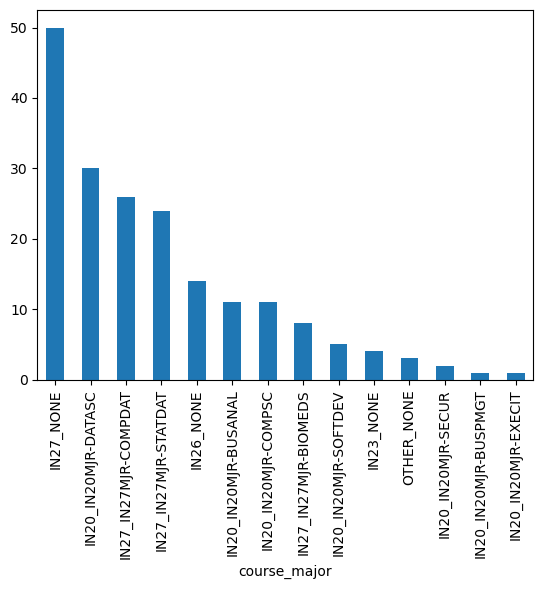

In [18]:
cm_chart = cm_df.total.plot(kind='bar')

However, the original grouped data lends itself to a stacked bar chart.

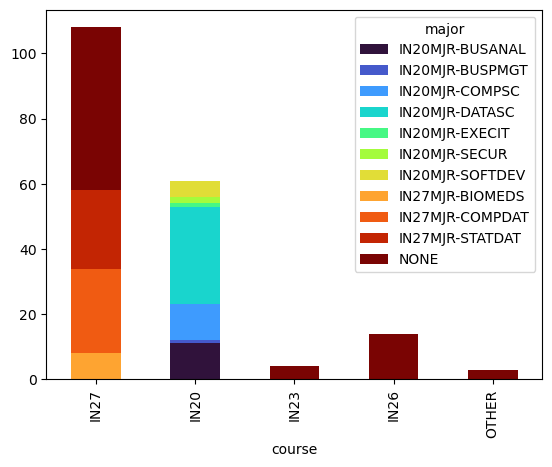

In [22]:
# Get the courses in sorted order
courses = list(class_df.course.unique())
#Use the grouped data, ordered by courses to created a stacked bar chart
cm_chart = class_df.groupby(['course','major']).size().unstack().loc[courses].plot(kind='bar', stacked=True,colormap="turbo")

When we are undertaking analysis, we may need to get information from other sources to help us make sense of the data. In this case, looking up QUT course codes is helpful:

| Code | Course
| -----|--------
| IN20 | Master IT
| IN23 | Master BPM
| IN26 | Grad Cert Data Analytics
| IN27 | Master Data Analytics

### Analyse

We can return to the analysis to do a similar analysis for the Studio and Tutorial sessions

In [20]:
# groupby for studio and tutes
studio_tute = class_df.groupby(['studio','tutorial']).size().reset_index(name="total")
studio_tute

,studio,tutorial,total
0,NR,NR,2
1,NR,TUT 5,2
2,STU 1,TUT 1,17
3,STU 1,TUT 2,3
4,STU 1,TUT 3,22
5,STU 1,TUT 5,7
6,STU 1,TUT 6,4
7,STU 2,TUT 1,5
8,STU 2,TUT 2,23
9,STU 2,TUT 3,8


### Visualise

And visualise these results

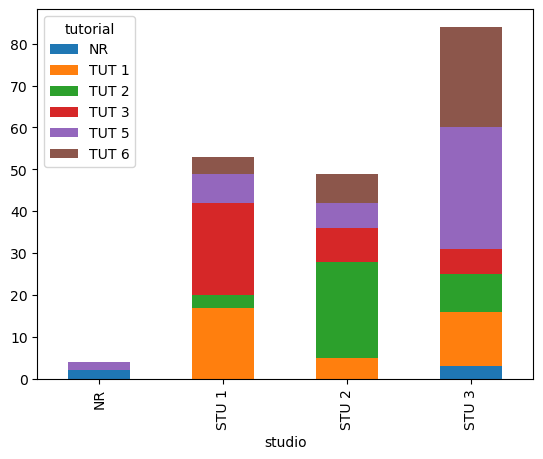

In [23]:
st_chart = class_df.groupby(['studio','tutorial']).size().unstack().plot(kind='bar', stacked=True)

### Insights

To derive insights, we need to think about the analysis and visualisation and relate them to the original question:

> **QUESTION** What different groups of students are studying IFN619, and how might information about the cohort help the teaching team provide meaningful learning experiences?

- What does our analysis and visualisation tell/show us that is relevant to the initial question?
- Which of the results are the most insightful and why?
- Do we need to do further analysis? Why?
- What further analysis is possible? Should it be considered? Why?
- What are the limitations of the data analytics that we've done. Can we overcome those limitations?


Considering these questions carefully can sometimes result in...
- re-thinking the original question
- looking for additional data to supplement the original data
- undertaking more cleaning of the original data
- pursuing further analysis or visualisation
- (occasionally) abandoning the approach and adopting a new approach

For example, it might be helpful to consider part time and full time modes and their relationship to the times of the tutorials and studio sessions...

In [24]:
# Create a dictionary to map times to tutorials and studios
class_times = {"STU 1":"afternoon",
               "STU 2":"morning",
               "STU 3":"afternoon",
               "TUT 1":"evening",
               "TUT 2":"morning",
               "TUT 3":"afternoon",
               "TUT 5":"evening",
               "TUT 6":"morning",
               "NR":"none"}

# Create a function to return the time for the session
def get_time(session):
    return class_times[session]

# Test the function
get_time('STU 1')

'afternoon'

In [25]:
# Create new columns for the times calculated based on the class_times dictionary
class_df['studio_time'] = class_df['studio'].apply(get_time)
class_df['tutorial_time'] = class_df['tutorial'].apply(get_time)
class_df

,course,mode,tutorial,studio,major,studio_time,tutorial_time
id,,,,,,,
6c6a005f-b7b2-4250-a025-a3d6d4d574f7,IN27,PT,TUT 6,STU 3,IN27MJR-STATDAT,afternoon,morning
b394172e-ba89-4d1d-9e69-e24fe10f8b3a,IN20,FT,TUT 2,STU 2,IN20MJR-DATASC,morning,morning
9d912798-7cf2-49dd-99c0-096b79f985d5,IN20,FT,TUT 5,STU 3,IN20MJR-SOFTDEV,afternoon,evening
377e91bf-7e57-47f6-b583-10a21e7ec73c,IN23,FT,TUT 3,STU 1,NONE,afternoon,afternoon
b3538492-3171-41e8-b130-bde084de87ce,IN27,FT,TUT 5,NR,IN27MJR-BIOMEDS,none,evening
3dc62211-dcf6-43ee-a1a1-6d08d534e2d8,IN27,FT,TUT 6,STU 3,IN27MJR-COMPDAT,afternoon,morning
bc911c9b-2275-40b6-82cd-da5872063a22,IN26,PT,TUT 5,STU 3,NONE,afternoon,evening
89a575df-6625-4c54-9165-5d221ce198f6,IN27,FT,TUT 6,STU 2,IN27MJR-COMPDAT,morning,morning
57dc553d-35b8-491d-8e71-daf427bb183e,IN27,FT,TUT 3,STU 3,IN27MJR-COMPDAT,afternoon,afternoon


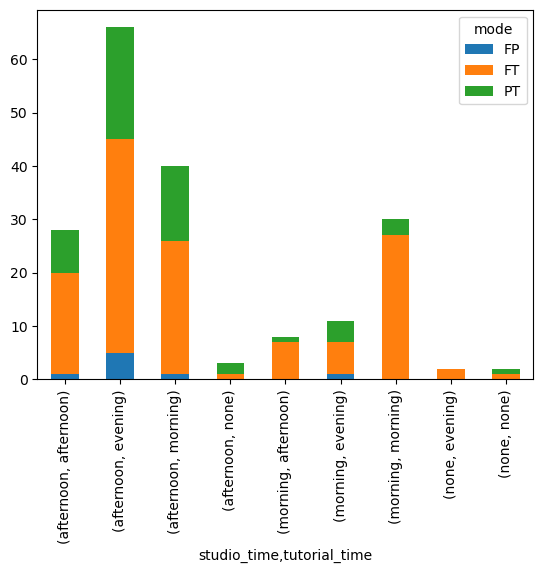

In [27]:
times_chart = class_df.groupby(['studio_time','tutorial_time','mode']).size().unstack().plot(kind='bar', stacked=True)

### Insights

Insights from this visualisation at first glance don't look surprising, but there are some factors in the data that can skew our interpretation...
- there are only limited times for students to select, and they are not offered in equal numbers
- not all offerings are available when class registration opens
- once a class is full, students need to register for a different class even if its not their preference
- there are not equal number of full-time and part-time students


### FINAL INSIGHTS

Through our analysis, we found that the majority of students are enrolled in the Master of Data Analytics (IN27 - $n=108$). This course is followed by the Master of IT (IN20 - $n=61$), the Grad Cert Data Analytics (IN26 - $14$), the Master of BPM (IN23 - $4$), and others ($n=3$). These numbers are not surprising as IFN619 is a core unit for the MDA.

Within the MDA, most students have not selected a particular major (or unit set), however for the IFN619 MIT students the most popular major is the Data Science major. Once again, this is not surprising as IFN619 is a core unit for the Data Science major in the MIT.

The most popular tutorials are tute 3 (Thu 12-2) for studio 1 (Mon 1-3), tute 2 (Thu 10-12) for studio 2 (Mon 10-12), and tute 5 (Thu 5-7) for studio 3 (Tues 3-5). The popularity of tute 5 for studio 3 is likely to be students that prefer to undertake all of their study online as both of these sessions are delivered online. Differences in preferences for the other 2 studios could be due to the registration options available when the students signed up, or maybe a result of other factors.

We tested another possible factor by looking at whether part-time students might be more likely to take afternoon/evening sessions that may be less disruptive to fulltime work. However, most full-time students selected an afternoon-eveing as did part-time students, so the analysis was inconclusive on this. 

Further analysis may be able reveal patterns by normalising the data to account for inequalities in the number of students between full-time and part-time, and also inequalities between the number of student places available in different time slots. Calculating percentages for these student numbers would help establish if dominant patterns were due to key factors (like mode and time), or whether they were merely the result of the numbers in each category.


---

## Next steps...

1. Experiment with the data and the code above to try different approaches to the analysis
2. Attend the tutorial, and try the data analytics cycle with a different problem
3. Try out some of the exercises during the week